In [32]:
sessionInfo()

R version 3.6.1 (2019-07-05)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 10 x64 (build 19041)

Matrix products: default

locale:
[1] LC_COLLATE=English_United States.1252 
[2] LC_CTYPE=English_United States.1252   
[3] LC_MONETARY=English_United States.1252
[4] LC_NUMERIC=C                          
[5] LC_TIME=English_United States.1252    

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] moments_0.14      effects_4.2-0     lmerTest_3.1-3    car_3.0-10       
 [5] carData_3.0-4     gridExtra_2.3     see_0.6.1         performance_0.6.1
 [9] plyr_1.8.6        emmeans_1.5.3     multcomp_1.4-15   TH.data_1.0-10   
[13] MASS_7.3-51.3     survival_3.2-7    mvtnorm_1.1-1     ggplot2_3.3.3    
[17] lme4_1.1-26       Matrix_1.2-17     jsonlite_1.6     

loaded via a namespace (and not attached):
 [1] tidyr_1.1.2         splines_3.6.1       statmod_1.4.35     
 [4] cellranger_1.1.0    bayestest

In [ ]:
library(lme4)
library(ggplot2)
library(multcomp)
library(emmeans)
library(plyr)
library(performance)
library(see)
library(gridExtra)
library(car)
library(lmerTest)
library(effects)
library(moments)
library(effectsize)
library(MuMIn)

In [2]:
setwd('D:/projects/ErgoVR/code')

# read data

In [11]:
df = read.csv(file = 'D:/projects/ErgoVR/processed_data/EIH_1/all_epoch_symmetry_19Jan.csv')

# summary of data

In [12]:
summary(df)

   subject_id     trial_num     trial_type    sym_index         grasp_num     
 Min.   :2006   Min.   : 2.00   easy:1144   Min.   :0.08333   Min.   : 3.000  
 1st Qu.:2020   1st Qu.: 7.00   hard: 808   1st Qu.:0.50854   1st Qu.: 7.000  
 Median :2033   Median :12.00               Median :0.63673   Median : 9.000  
 Mean   :2035   Mean   :12.51               Mean   :0.64041   Mean   : 9.918  
 3rd Qu.:2050   3rd Qu.:18.00               3rd Qu.:0.77513   3rd Qu.:12.000  
 Max.   :2062   Max.   :26.00               Max.   :1.00000   Max.   :31.000  
       epoch    
 execution:975  
 planning :977  
                
                
                
                

# center the categorical and continuous variables

In [13]:
df$trial_type.effect <- factor(df$trial_type)
c <-contr.treatment(2, base=1)
my.coding <- matrix(rep(1/2,2),ncol=1)
my.simpleT <- c - my.coding
contrasts(df$trial_type.effect) <- my.simpleT
contrasts(df$trial_type.effect)


,2
easy,-0.5
hard,0.5


In [14]:
df$epoch.effect <- factor(df$epoch)
c <-contr.treatment(2, base=1)
my.coding <- matrix(rep(1/2,2),ncol=1)
my.simpleT <- c - my.coding
contrasts(df$epoch.effect) <- my.simpleT
contrasts(df$epoch.effect)

,2
execution,-0.5
planning,0.5


In [15]:
df$grasp_num.center <- df$grasp_num - mean(df$grasp_num)


# make models

In [83]:
strictControl <- lmerControl(optCtrl = list(
   algorithm = "NLOPT_LN_NELDERMEAD",
   xtol_abs = 1e-8,
   ftol_abs = 1e-8))


model_1 <- lmer(
    sym_index ~ 1 + trial_type.effect * epoch.effect * grasp_num.center
    + (1 + trial_type.effect + epoch.effect | subject_id),
    data=df,
    control=strictControl
)
summary(model_1)


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: sym_index ~ 1 + trial_type.effect * epoch.effect * grasp_num.center +  
    (1 + trial_type.effect + epoch.effect | subject_id)
   Data: df
Control: strictControl

REML criterion at convergence: -2179.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.9192 -0.6019  0.0194  0.6536  3.4082 

Random effects:
 Groups     Name               Variance  Std.Dev. Corr       
 subject_id (Intercept)        0.0135758 0.11652             
            trial_type.effect2 0.0002834 0.01683   0.20      
            epoch.effect2      0.0045868 0.06773  -0.55  0.08
 Residual                      0.0164886 0.12841             
Number of obs: 1952, groups:  subject_id, 48

Fixed effects:
                                                    Estimate Std. Error
(Intercept)                                        6.457e-01  1.719e-02
trial_type.effect2                                -4.171e-02  7.770e

In [84]:
model_null <- lmer(
    sym_index ~ 1
    + (1 + trial_type.effect + epoch.effect | subject_id),
    data=df,
    control=strictControl
    #control=lmerControl(optimizer="bobyqa", optCtrl=list(maxfun=10e5))
)
summary(model_null)


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: sym_index ~ 1 + (1 + trial_type.effect + epoch.effect | subject_id)
   Data: df
Control: strictControl

REML criterion at convergence: -2191.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.9082 -0.5980  0.0195  0.6485  3.3756 

Random effects:
 Groups     Name               Variance Std.Dev. Corr       
 subject_id (Intercept)        0.013855 0.11771             
            trial_type.effect2 0.001115 0.03339   0.14      
            epoch.effect2      0.004519 0.06722  -0.55 -0.10
 Residual                      0.016756 0.12945             
Number of obs: 1952, groups:  subject_id, 48

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)  0.65064    0.01524 47.28919    42.7   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [91]:
tmp <- parameters::model_parameters(model_1, effects = "fixed", df_method = "satterthwaite")
format(tmp, format='f', digits=5)
#write.csv(tmp, './model_1.csv')

Parameter,Coefficient,SE,95% CI,t,df,p
(Intercept),0.64566,0.01719,"0.61, 0.68",37.55518,48.36,< .001
trial_type.effect2,-0.04171,0.00777,"-0.06, -0.03",-5.36828,87.04,< .001
epoch.effect2,0.02260,0.01207,"-1.05e-03, 0.05",1.87284,59.26,0.066
grasp_num.center,0.00292,0.00093,"1.10e-03, 4.74e-03",3.13893,1448.78,0.002
trial_type.effect2 * epoch.effect2,-0.03855,0.01448,"-0.07, -0.01",-2.66248,1835.94,0.008
trial_type.effect2 * grasp_num.center,-0.00832,0.00176,"-0.01, -4.86e-03",-4.71336,770.47,< .001
epoch.effect2 * grasp_num.center,0.00147,0.00177,"-2.01e-03, 4.94e-03",0.82581,1573.90,0.409
(trial_type.effect2 * epoch.effect2) * grasp_num.center,-0.00936,0.00341,"-0.02, -2.68e-03",-2.74740,1814.87,0.006


In [81]:
an_model <- anova(model_1)
print(an_model)
F_to_eta2(
  f = an_model[,5],
  df = an_model[,3],
  df_error = an_model[,4],
    CI=95
)

Type III Analysis of Variance Table with Satterthwaite's method
                                                 Sum Sq Mean Sq NumDF   DenDF
trial_type.effect                               0.47518 0.47518     1   87.04
epoch.effect                                    0.05783 0.05783     1   59.26
grasp_num.center                                0.16246 0.16246     1 1448.78
trial_type.effect:epoch.effect                  0.11688 0.11688     1 1835.94
trial_type.effect:grasp_num.center              0.36631 0.36631     1  770.47
epoch.effect:grasp_num.center                   0.01124 0.01124     1 1573.90
trial_type.effect:epoch.effect:grasp_num.center 0.12446 0.12446     1 1814.87
                                                F value    Pr(>F)    
trial_type.effect                               28.8185 6.512e-07 ***
epoch.effect                                     3.5075  0.066026 .  
grasp_num.center                                 9.8529  0.001730 ** 
trial_type.effect:epoch.effect  

Eta2_partial,CI,CI_low,CI_high
0.2487462466,0.9,0.1282718638,0.368693675
0.0558842503,0.9,0.0000000000,0.174074931
0.0067548609,0.9,0.0015315285,0.015564531
0.0038462815,0.9,0.0005602938,0.010010053
0.0280258832,0.9,0.0119698037,0.050007901
0.0004331076,0.9,0.0000000000,0.003848555
0.0041418541,0.9,0.0006661083,0.010524389


In [85]:
r.squaredGLMM(model_1)

R2m,R2c
0.01889932,0.4816604


In [18]:
e = allEffects(model_1)
print(e)

 model: sym_index ~ 1 + trial_type.effect * epoch.effect + grasp_num.center

 grasp_num.center effect
grasp_num.center
       -7      0.08         7        10        20 
0.6358076 0.6391189 0.6423554 0.6437585 0.6484355 

 trial_type.effect*epoch.effect effect
                 epoch.effect
trial_type.effect execution  planning
             easy 0.6393165 0.6649875
             hard 0.6230555 0.6180638


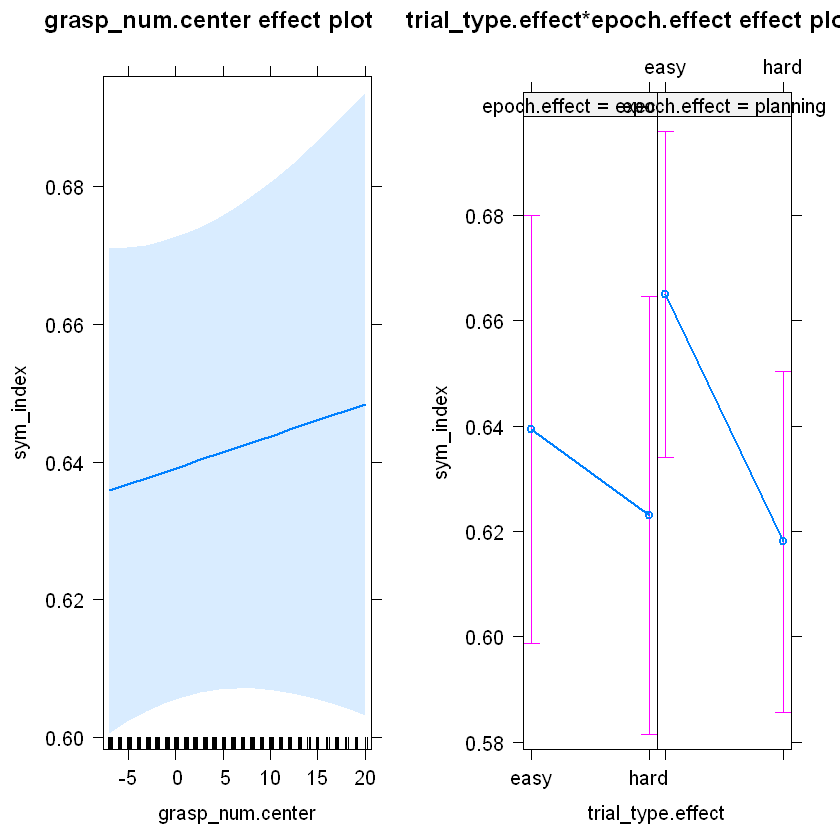

In [20]:
plot(e)

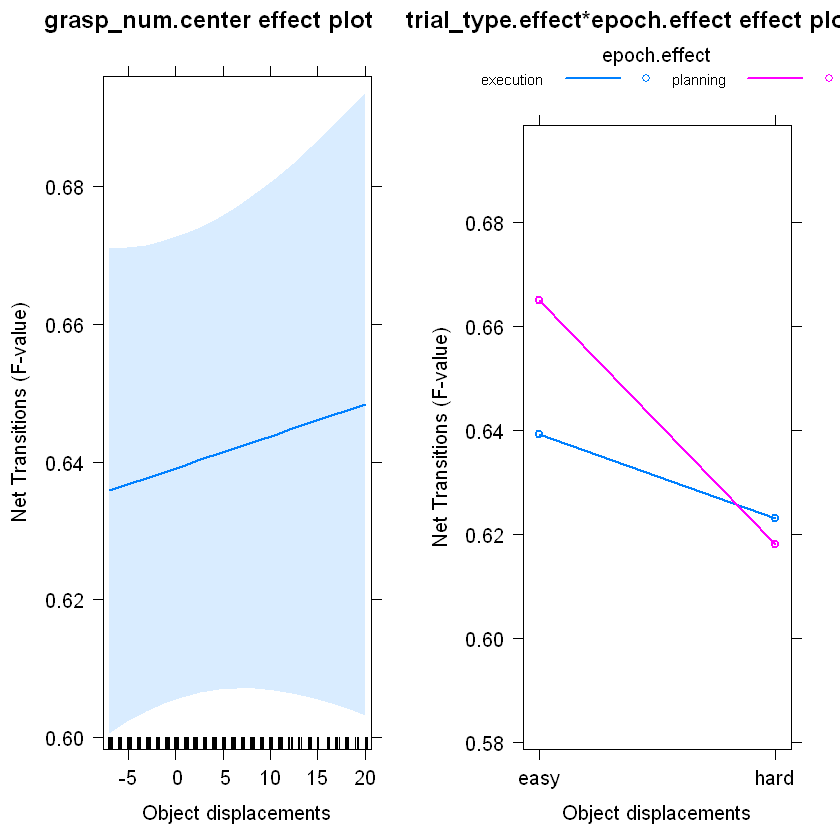

In [21]:
plot(e,multiline=TRUE,confint=TRUE,ci.style="bands"
     ,xlab="Object displacements"
     ,ylab="Net Transitions (F-value)",
    )